In [30]:
import sys

sys.path.append(".../src")
sys.path.append(".../Bayer")
sys.path.append(".../Fuji")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from skimage import io
import numpy as np
from skimage import transform
from src.convlotuion import apply_convolution, convolution_for_edge_finders
from src.filters import blur_kernel, sharpen_kernel, laplace_kernel, gauss_blur_kernel
from src.filters import sobel_kernel, scharr_kernel, prewitt_kernel

In [32]:
image = io.imread("szczupak.jpg")
image=transform.resize(image,output_shape=(600,1000,3))
image.shape


(600, 1000, 3)

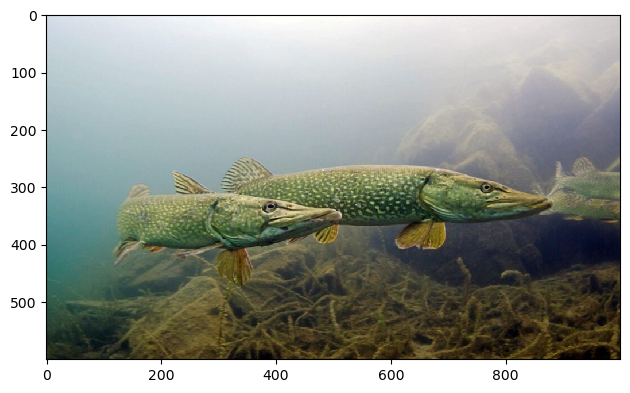

In [33]:
io.imshow(image)

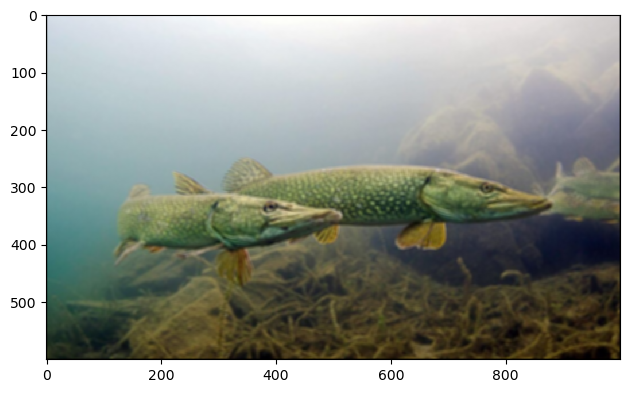

In [34]:
blure_filter=blur_kernel(size=6)
blur_image = apply_convolution(image, blure_filter)
io.imshow(blur_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


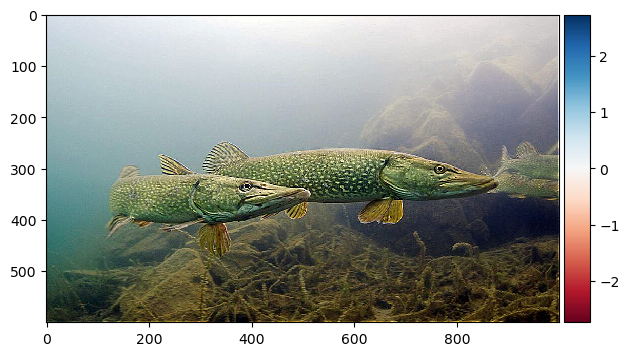

In [35]:
sharpen_filter=sharpen_kernel()
sharpen_image = apply_convolution(image, sharpen_filter)
io.imshow(sharpen_image)

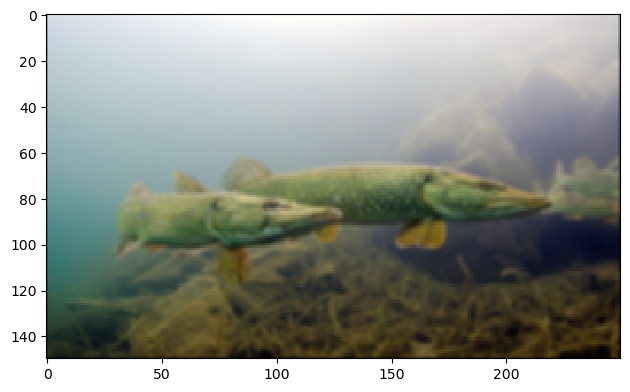

In [36]:
image=transform.resize(image,output_shape=(150,250,3))
gauss_blur_filter=gauss_blur_kernel()
Gauss_blured_image=apply_convolution(image, gauss_blur_filter)
io.imshow(Gauss_blured_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


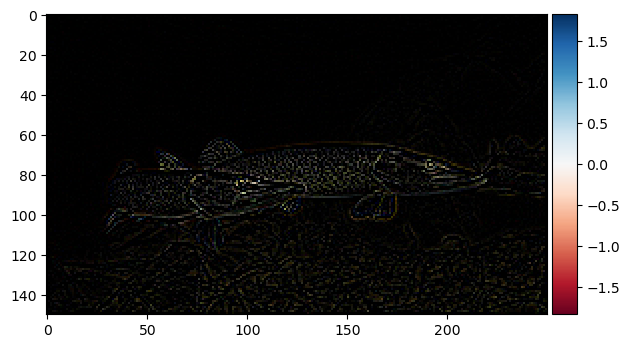

In [37]:
image=transform.resize(image,output_shape=(150,250,3))
edge_filter=laplace_kernel()
edges=apply_convolution(image, edge_filter)
io.imshow(edges)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


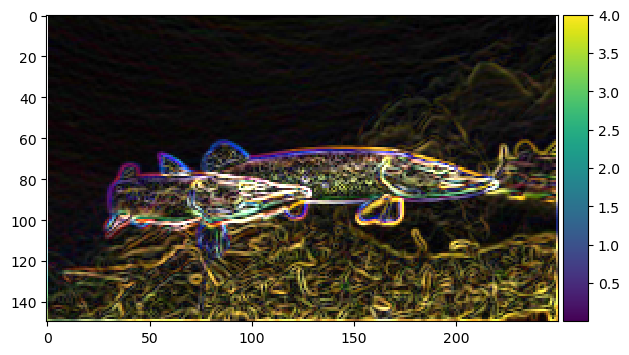

In [38]:
sobel_x, sobel_y = sobel_kernel()
sobel_edges_x = apply_convolution(image, sobel_x)
sobel_edges_y = apply_convolution(image, sobel_y)

#sobel_edges_img = np.sqrt(sobel_edges_x ** 2) For a fast comparison purposes
#sobel_edges_img = np.sqrt(sobel_edges_y ** 2)

sobel_edges_img = np.sqrt(sobel_edges_x ** 2 + sobel_edges_y ** 2)
io.imshow(sobel_edges_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


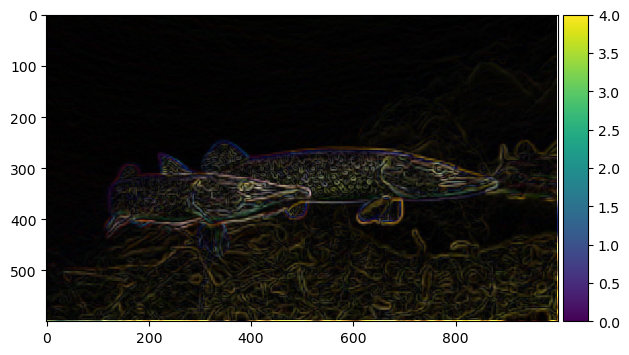

In [39]:
image=transform.resize(image,output_shape=(600,1000,3))

sobel_edges_img = convolution_for_edge_finders(image, (sobel_x, sobel_y))
io.imshow(sobel_edges_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


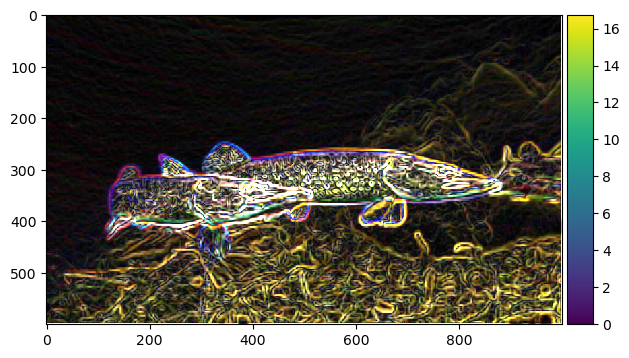

In [40]:
scharr_x , scharr_y = scharr_kernel()
scharr_edges_img = convolution_for_edge_finders(image, (scharr_x, scharr_y ))
io.imshow(scharr_edges_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


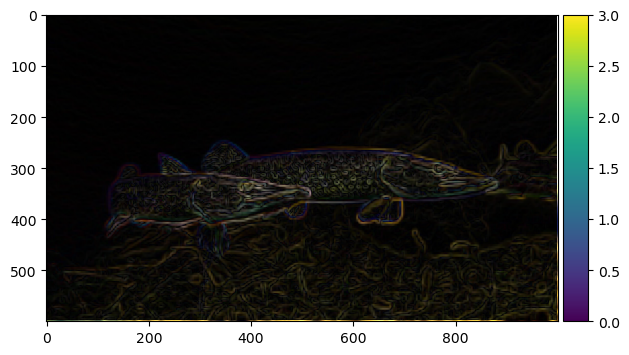

In [41]:
prewitt_x , prewitt_y = prewitt_kernel()
prewitt_edges_img = convolution_for_edge_finders(image, (prewitt_x, prewitt_y ))
io.imshow(prewitt_edges_img)